In [1]:
from countminsketch.countminsketch import CountMinSketch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
d = 10
w = 100
cms = CountMinSketch(d=10, w=100)

In [3]:
a = 1.1
s = np.random.zipf(a, 100000)

In [4]:
actual_counts = {}
for val in s:
    int_val = int(val)
    actual_counts.setdefault(int_val, 0)
    actual_counts[int_val] += 1
    cms.add(int_val)

In [5]:
print("There are {} unique values in the data".format(len(actual_counts.keys())))
print("The CountMinSketch contains {} elements".format(len(cms)))

There are 43011 unique values in the data
The CountMinSketch contains 1000 elements


In [6]:
est_counts = []
for val in actual_counts.keys():
    est_counts.append(cms.query(val))

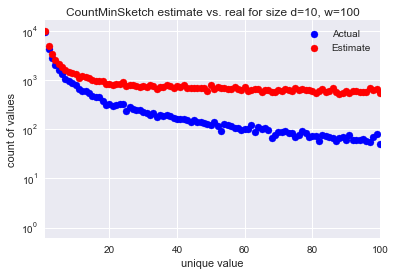

In [10]:
#count, bins, ignored = plt.hist(s, 100, normed=False)
#x = np.arange(1., 50.)
#y = x**(-a) / special.zetac(a)
#plt.plot(x, y/max(y), linewidth=2, color='r')
plt.scatter(list(actual_counts.keys()), list(actual_counts.values()), color='b', label='Actual')
plt.scatter(list(actual_counts.keys()),est_counts, color='r', label='Estimate')
plt.legend()
plt.yscale('log')
plt.xlim([1,100])
plt.xlabel('unique value')
plt.ylabel('count of values')
plt.title('CountMinSketch estimate vs. real for size d={}, w={}'.format(d,w))
plt.show()

In [17]:
d = 20
w = 1000
cms = CountMinSketch(d=d, w=w)
a = 1.1
s = np.random.zipf(a, 1000000)

In [18]:
actual_counts = {}
for val in s:
    int_val = int(val)
    actual_counts.setdefault(int_val, 0)
    actual_counts[int_val] += 1
    cms.add(int_val)

In [19]:
est_counts = []
for val in actual_counts.keys():
    est_counts.append(cms.query(val))

In [20]:
print("There are {} unique values in the data".format(len(actual_counts.keys())))
print("The CountMinSketch contains {} elements".format(len(cms)))

There are 347345 unique values in the data
The CountMinSketch contains 20000 elements


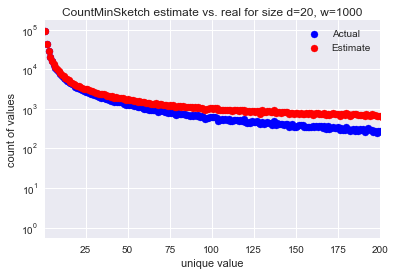

In [21]:
plt.scatter(list(actual_counts.keys()), list(actual_counts.values()), color='b', label='Actual')
plt.scatter(list(actual_counts.keys()),est_counts, color='r', label='Estimate')
plt.legend()
plt.yscale('log')
plt.xlim([1,200])
plt.xlabel('unique value')
plt.ylabel('count of values')
plt.title('CountMinSketch estimate vs. real for size d={}, w={}'.format(d,w))
plt.show()